In [16]:
# Fpl_stat which was obtained through web scraping will be used here.
# Lets Gooooooooo

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp

import sklearn as sk

from pandas.plotting import scatter_matrix # Allows to visualize the relationship between multiple variables in a dataset at once
from matplotlib import pyplot # Creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels...
from sklearn.model_selection import train_test_split # Splitting data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import cross_val_score # Controls the number of jobs that get dispatched during parallel execution
from sklearn.model_selection import StratifiedKFold # cross-validation object is a variation of KFold that returns stratifield folds????
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns 

In [40]:
fplPlayer_data = "Fpl_stat"

In [41]:
df_key_stats_2021 = pd.read_csv(fplPlayer_data)
df_key_stats_2021.keys()
# df_key_stats_2021.value_counts()

Index(['first_name', 'second_name', 'team', 'now_cost', 'total_points',
       'points_per_game', 'transfers_in', 'transfers_out', 'value_season',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'creativity_rank', 'threat_rank',
       'ict_index_rank'],
      dtype='object')

In [42]:
df_key_stats_2021.columns = ['first_name', 'second_name', 'team', 'now_cost', 'total_points', 
                             'points_per_game', 'transfers_in', 'transfers_out', 'value_season',
                             'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_concedd',
                             'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
                             'saves', 'bonus', 'bps', 'influence', 'creativity', 'yellow_cards',
                             'ict_index', 'influence_rank', 'creativity_rank', 'threat_rank',
                             'ict_index_rank']
df_key_stats_2021

,first_name,second_name,team,now_cost,total_points,points_per_game,transfers_in,transfers_out,value_season,minutes,...,bonus,bps,influence,creativity,yellow_cards,ict_index,influence_rank,creativity_rank,threat_rank,ict_index_rank
0,Bernd,Leno,1,45,10,2.5,80503,204514,2.2,360,...,0,69,85.0,0.0,0.0,8.5,392,614,596,440
1,Rúnar Alex,Rúnarsson,1,40,0,0.0,19017,80861,0.0,0,...,0,0,0.0,0.0,0.0,0.0,536,522,487,540
2,Willian,Borges Da Silva,1,63,0,0.0,914,20531,0.0,0,...,0,0,0.0,0.0,0.0,0.0,727,727,727,727
3,Pierre-Emerick,Aubameyang,1,96,44,3.1,742898,899320,4.6,1036,...,7,131,217.6,132.4,582.0,92.9,285,241,54,164
4,Cédric,Soares,1,42,33,1.8,63294,50991,7.9,1250,...,0,243,239.6,280.7,75.0,59.7,273,142,314,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Bruno André,Cavaco Jordão,20,45,0,0.0,612,540,0.0,0,...,0,0,0.0,0.0,0.0,0.0,653,650,636,655
727,Toti António,Gomes,20,44,3,1.5,609,510,0.7,180,...,0,22,41.6,1.8,0.0,4.3,433,456,586,457
728,Dion,Sanderson,20,40,0,0.0,241,193,0.0,0,...,0,0,0.0,0.0,0.0,0.0,547,534,499,551
729,Ryan,Giles,20,45,0,0.0,86,62,0.0,0,...,0,0,0.0,0.0,0.0,0.0,644,639,625,645


In [43]:
df_key_stats_2021 = df_key_stats_2021[['first_name', 'second_name', 'total_points', 'minutes', 'goals_scored', 'assists',
                                       'points_per_game', 'bonus', 'bps', 'influence', 'creativity']]
df_key_stats_2021 = df_key_stats_2021.iloc[1:]
df_key_stats_2021

,first_name,second_name,total_points,minutes,goals_scored,assists,points_per_game,bonus,bps,influence,creativity
1,Rúnar Alex,Rúnarsson,0,0,0,0,0.0,0,0,0.0,0.0
2,Willian,Borges Da Silva,0,0,0,0,0.0,0,0,0.0,0.0
3,Pierre-Emerick,Aubameyang,44,1036,4,1,3.1,7,131,217.6,132.4
4,Cédric,Soares,33,1250,0,0,1.8,0,243,239.6,280.7
5,Alexandre,Lacazette,87,1705,4,8,3.2,3,293,376.4,384.1
...,...,...,...,...,...,...,...,...,...,...,...
726,Bruno André,Cavaco Jordão,0,0,0,0,0.0,0,0,0.0,0.0
727,Toti António,Gomes,3,180,0,0,1.5,0,22,41.6,1.8
728,Dion,Sanderson,0,0,0,0,0.0,0,0,0.0,0.0
729,Ryan,Giles,0,0,0,0,0.0,0,0,0.0,0.0


In [44]:
print(df_key_stats_2021.shape)

(730, 11)


In [45]:
df_key_stats_2021.isnull().values.any() # Checks if there are any NaN values in the Dataframes

False

In [46]:
dataTypeDict = dict(df_key_stats_2021.dtypes)
print(dataTypeDict)

{'first_name': dtype('O'), 'second_name': dtype('O'), 'total_points': dtype('int64'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'points_per_game': dtype('float64'), 'bonus': dtype('int64'), 'bps': dtype('int64'), 'influence': dtype('float64'), 'creativity': dtype('float64')}


In [47]:
print(df_key_stats_2021.describe()) # describes the data

       total_points      minutes  goals_scored     assists  points_per_game  \
count    730.000000   730.000000    730.000000  730.000000       730.000000   
mean      39.939726   950.702740      1.297260    1.172603         1.884795   
std       45.992505  1003.098853      2.676549    2.068197         1.599546   
min       -1.000000     0.000000      0.000000    0.000000         0.000000   
25%        0.000000     0.000000      0.000000    0.000000         0.000000   
50%       21.000000   623.500000      0.000000    0.000000         1.900000   
75%       69.750000  1768.250000      1.000000    2.000000         3.000000   
max      258.000000  3330.000000     22.000000   17.000000         9.000000   

            bonus         bps    influence   creativity  
count  730.000000  730.000000   730.000000   730.000000  
mean     3.091781  173.698630   210.296438   138.893699  
std      4.948687  196.010952   241.978772   206.424549  
min      0.000000   -3.000000     0.000000     0.000000 

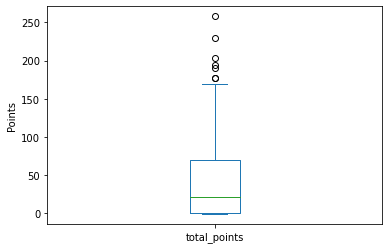

In [48]:
df_key_stats_2021['total_points'].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.ylabel('Points')
plt.show()

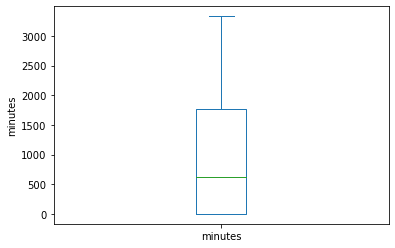

In [49]:
df_key_stats_2021['minutes'].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.ylabel('minutes')
plt.show()

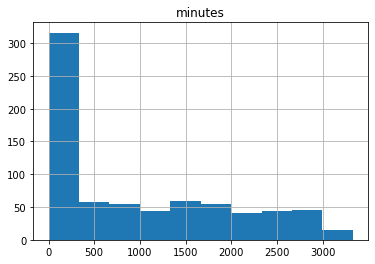

In [50]:
df_key_stats_2021[['minutes']].hist()
plt.show()

In [51]:
df_key_stats_2021.sort_values('minutes', inplace=True, ascending=True)
df_key_stats_2021
count = 0
for index, row in df_key_stats_2021.iterrows():
    if(row['minutes'])<600:
        count +=1
        continue
    else:
        break
print(count)
df_key_stats_2021 = df_key_stats_2021[285:]

364


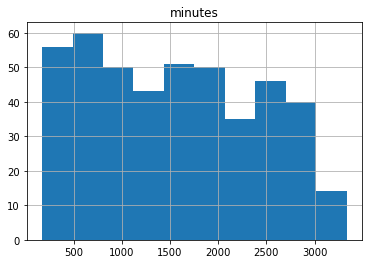

In [52]:
df_key_stats_2021[['minutes']].hist()
plt.show()

In [ ]:
df_key_stats_2021['total_points'].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.show()